# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Image Preprocessing

In [2]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
                'Training',target_size=(64,64),batch_size=32,class_mode='categorical')

Found 67692 images belonging to 131 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('Test',target_size=(64,64),batch_size=32,class_mode='categorical',shuffle=False)

Found 22688 images belonging to 131 classes.


# Loading Model

In [5]:
cnn = tf.keras.models.load_model('trained_model.h5')

# Calculating Confusion Matrix

In [6]:
#Making Confusion Matrix
from sklearn.metrics import confusion_matrix
batch_size=32
num_of_test_samples=22688
Y_pred = cnn.predict(test_set, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_set.classes, y_pred)
print(cm)

Confusion Matrix
[[109   0   0 ...   0   0   0]
 [  0 145   0 ...   0   0   0]
 [  0   0 160 ...   0   0   0]
 ...
 [  0   0   0 ... 158   0   0]
 [  0   0   0 ...   0 249   0]
 [  0   0   0 ...   0   0 157]]


In [7]:
#training_set.class_indices

# Confusion Matrix Visualization

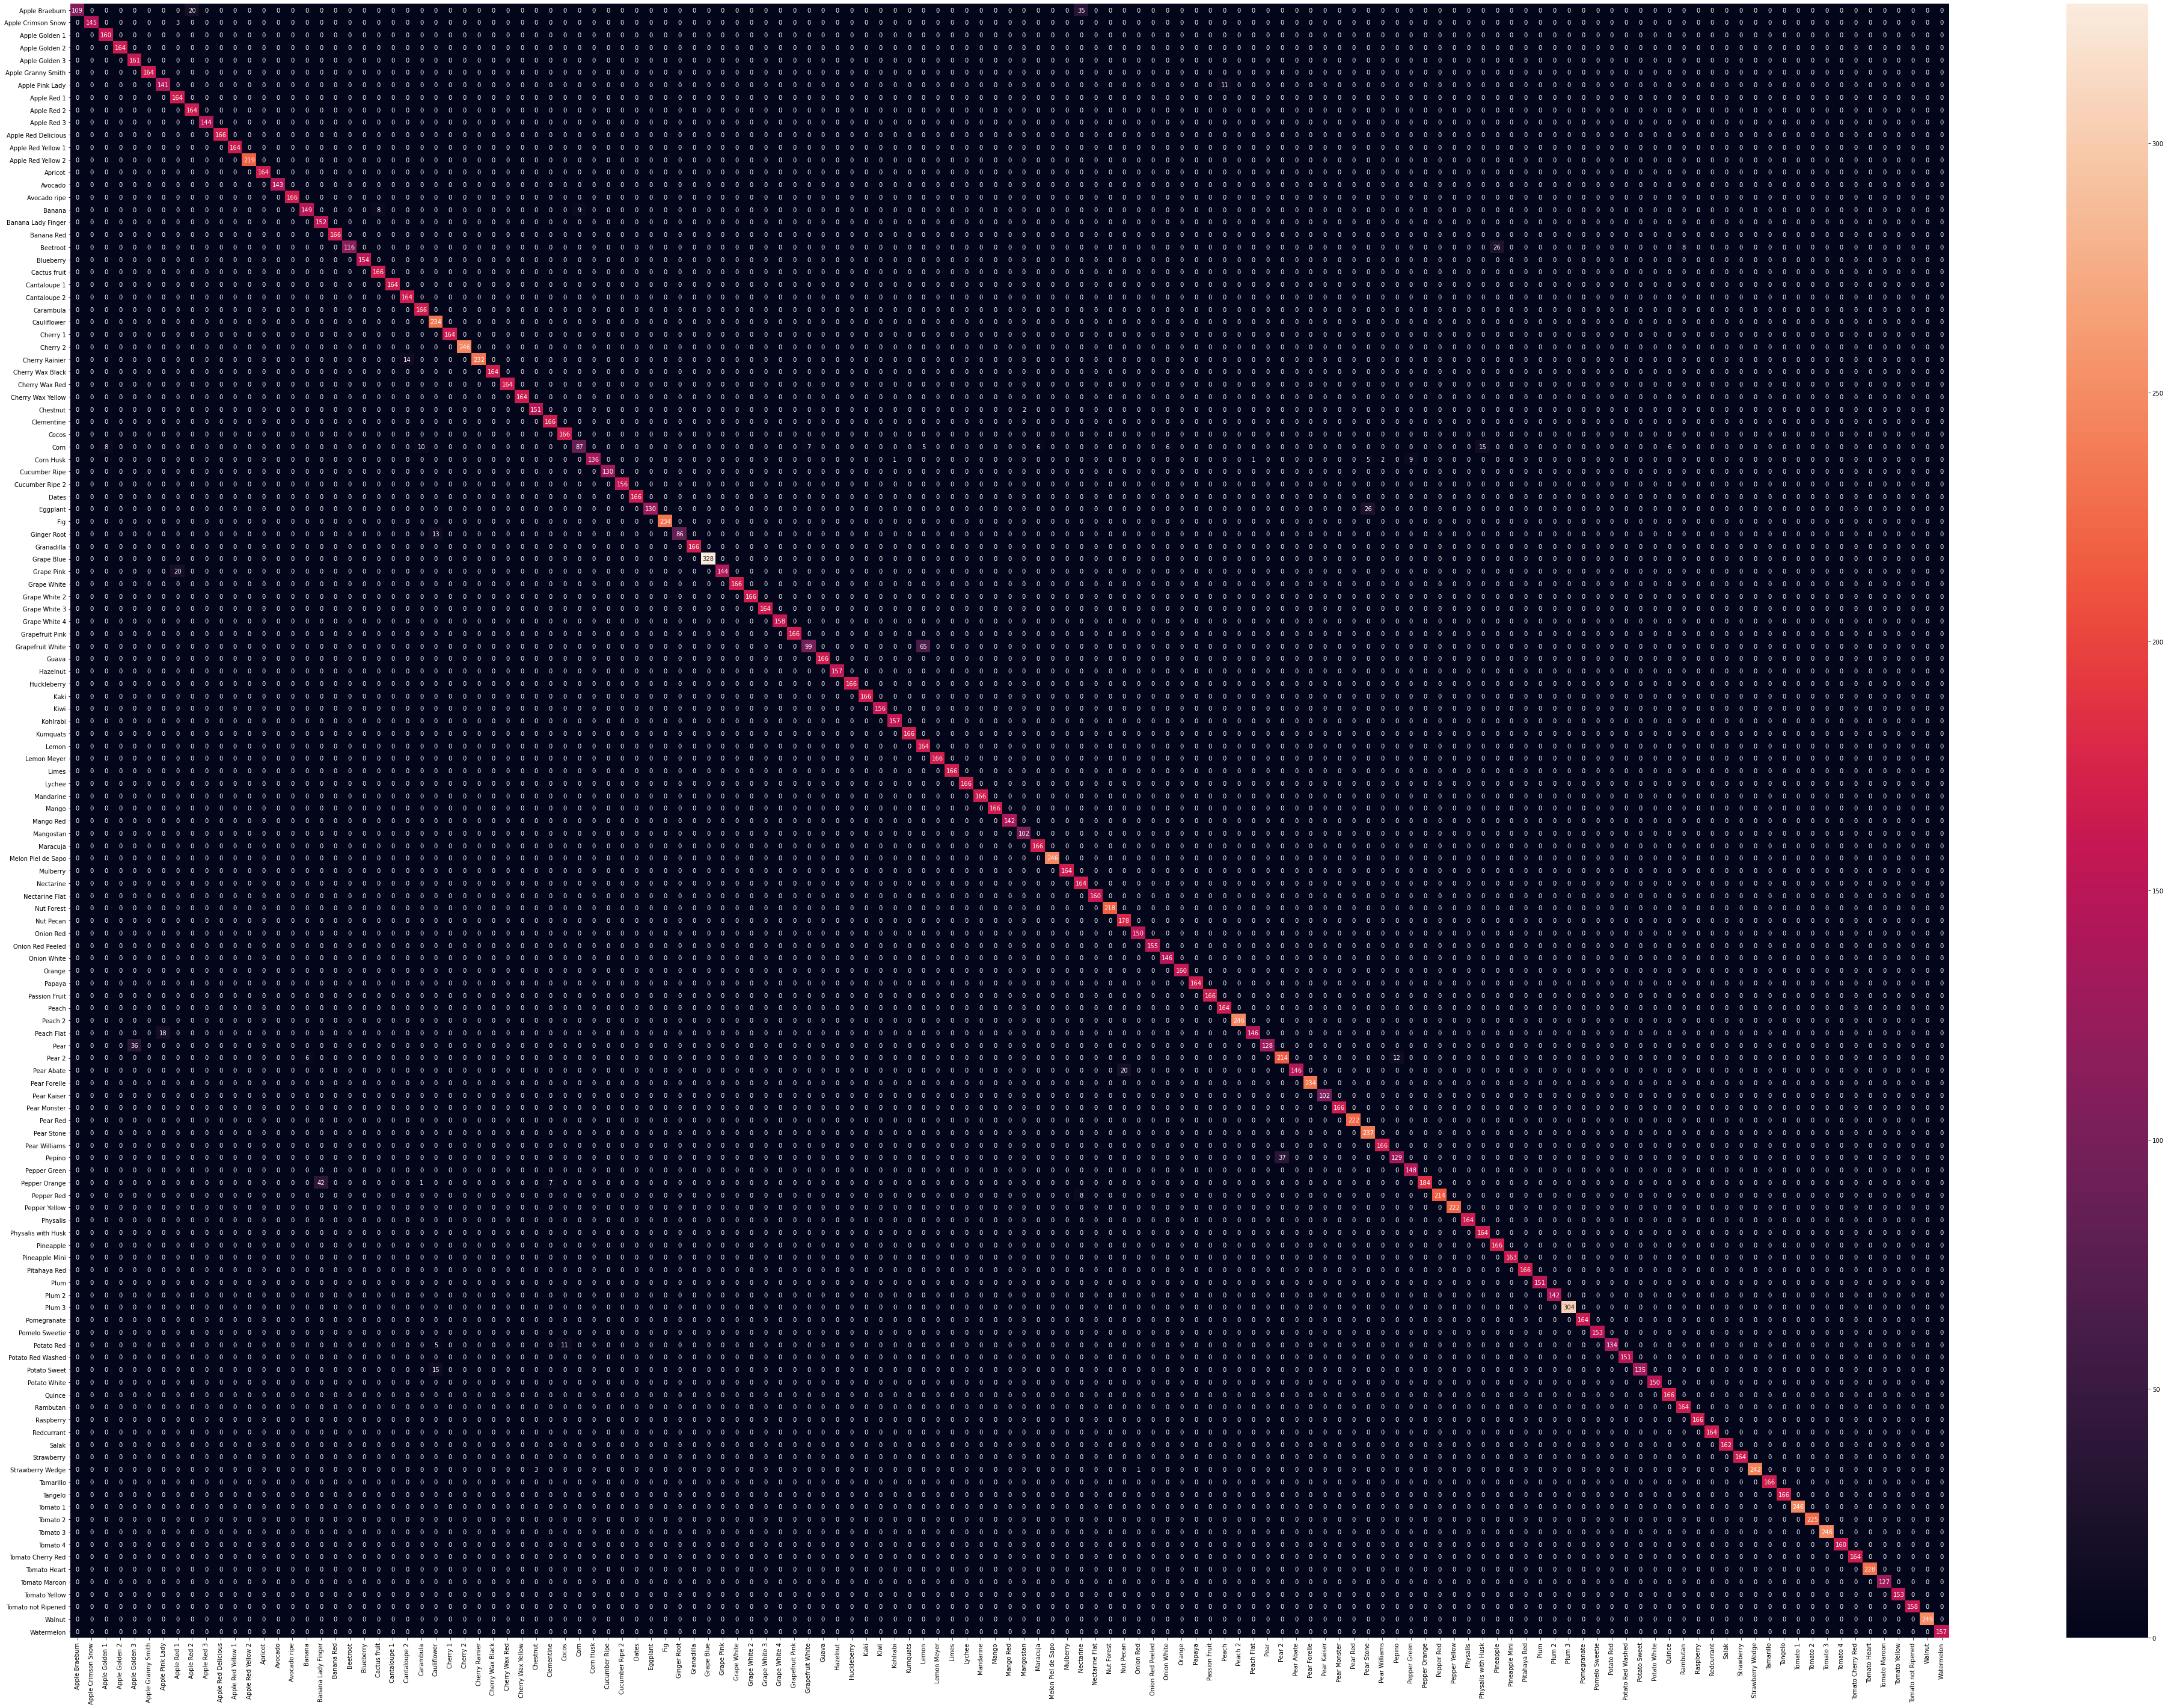

In [8]:
import seaborn as sns
plt.figure(figsize=(70,50))
sns.heatmap(cm, annot=True, fmt='d',xticklabels=test_set.class_indices.keys(), yticklabels=test_set.class_indices.keys())
#plt.savefig('Confusion_matrix.jpg',format='jpg',dpi=1000)
plt.show()

# Accuracy Score of Model

In [9]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(test_set.classes,y_pred)
print("Accuracy Score: {} %".format(acc*100))

Accuracy Score: 97.51851198871651 %


In [10]:
training_set.class_indices

{'Apple Braeburn': 0,
 'Apple Crimson Snow': 1,
 'Apple Golden 1': 2,
 'Apple Golden 2': 3,
 'Apple Golden 3': 4,
 'Apple Granny Smith': 5,
 'Apple Pink Lady': 6,
 'Apple Red 1': 7,
 'Apple Red 2': 8,
 'Apple Red 3': 9,
 'Apple Red Delicious': 10,
 'Apple Red Yellow 1': 11,
 'Apple Red Yellow 2': 12,
 'Apricot': 13,
 'Avocado': 14,
 'Avocado ripe': 15,
 'Banana': 16,
 'Banana Lady Finger': 17,
 'Banana Red': 18,
 'Beetroot': 19,
 'Blueberry': 20,
 'Cactus fruit': 21,
 'Cantaloupe 1': 22,
 'Cantaloupe 2': 23,
 'Carambula': 24,
 'Cauliflower': 25,
 'Cherry 1': 26,
 'Cherry 2': 27,
 'Cherry Rainier': 28,
 'Cherry Wax Black': 29,
 'Cherry Wax Red': 30,
 'Cherry Wax Yellow': 31,
 'Chestnut': 32,
 'Clementine': 33,
 'Cocos': 34,
 'Corn': 35,
 'Corn Husk': 36,
 'Cucumber Ripe': 37,
 'Cucumber Ripe 2': 38,
 'Dates': 39,
 'Eggplant': 40,
 'Fig': 41,
 'Ginger Root': 42,
 'Granadilla': 43,
 'Grape Blue': 44,
 'Grape Pink': 45,
 'Grape White': 46,
 'Grape White 2': 47,
 'Grape White 3': 48,
 'Grap